# Bank Market Analysis



There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients. In this code along we are doing the data analysis using the pandas.


## Understanding the dataset

**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
There are four datasets:
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with fewer inputs).
bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with fewer inputs). The smallest datasets are provided to test more computationally demanding machine learning algorithms 
Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Features**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|age|numeric|age of a person|  
|job |Categorigol,nominal|type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|  
|marital|categorical,nominal|marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|  
|education|categorical,nominal| ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | 
|default|categorical,nominal| has credit in default? ('no','yes','unknown')|  
|housing|categorical,nominal| has housing loan? ('no','yes','unknown')|  
|loan|categorical,nominal| has personal loan? ('no','yes','unknown')|  
|contact|categorical,nominal| contact communication type ('cellular','telephone')|  
|month|categorical,ordinal| last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')| 
|day_of_week|categorical,ordinal| last contact day of the week ('mon','tue','wed','thu','fri')|  
|duration|numeric| last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')|
|campaign|numeric|number of contacts performed during this campaign and for this client (includes last contact)|  
|pdays|numeric| number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)|  
|previous|numeric| number of contacts performed before this campaign and for this client|  
|poutcome|categorical,nominal| outcome of the previous marketing campaign ('failure','nonexistent','success')|  
|emp.var.rate|numeric|employment variation rate - quarterly indicator|  
|cons.price.idx|numeric| consumer price index - monthly indicator|  
|cons.conf.idx|numeric| consumer confidence index - monthly indicator|  
|euribor3m|numeric|euribor 3 month rate - daily indicator|
|nr.employed|numeric| number of employees - quarterly indicator|   
|y | binary| has the client subscribed a term deposit? ('yes','no')|



## Read the data

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('bank.csv',delimiter=';')

In [37]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [38]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Replace the `unknown` values with the `Nan` and check the value count of missing values and drop the missing rows

In [39]:
df.replace("unknown",np.nan,inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,NaN,no


In [40]:
df.isna().sum().sum()

5254

In [41]:
df.dropna(inplace=True)

## Replace the column name from `loan` to `previous_loan_status` and `y` to `loan_status` 

In [42]:
df.rename(columns={'loan':'previous_loan_status','y':'loan_status'},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,previous_loan_status,contact,day,month,duration,campaign,pdays,previous,poutcome,loan_status
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## Find out the information of the `job` column.

In [43]:
df['job'].value_counts()

management       177
blue-collar      143
technician       137
admin.           102
services          58
retired           44
self-employed     26
entrepreneur      21
unemployed        20
student           19
housemaid         17
Name: job, dtype: int64

## Check the `loan_status`  approval rate by `job`

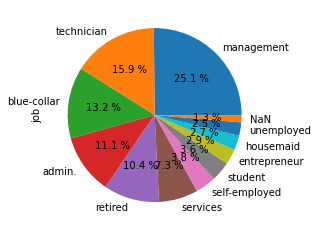

In [21]:
df['job'].where(df["loan_status"]=="yes").value_counts().plot(kind='pie',autopct='%.1f %%')

## Check the percentage of loan approved by `education`

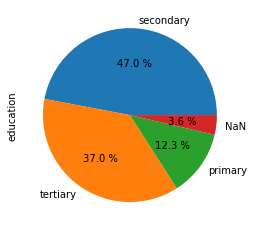

In [22]:
df['education'].where(df["loan_status"]=="yes").value_counts().plot(kind='pie',autopct='%.1f %%')

## Check the percentage of loan approved by `previous loan status`

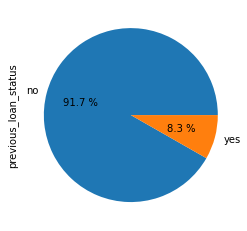

In [25]:
df['previous_loan_status'].where(df["loan_status"]=="yes").value_counts().plot(kind='pie',autopct='%.1f %%')

## Create a pivot table between `loan_status` and `marital ` with values form `age`

In [26]:
pd.pivot_table(df, values='age', index=['loan_status'],columns=['marital'], aggfunc=np.sum)

marital,divorced,married,single
loan_status,,,
no,20234,108794,34964
yes,3777,12748,5613


## Loan status based on marital status whose status is married

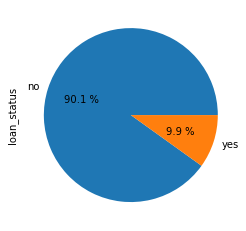

In [27]:
df['loan_status'].where(df["marital"]=="married").value_counts().plot(kind='pie',autopct='%.1f %%')

## Create a  Dataframes


In [30]:
# class 1
branch_1 = {
        'customer_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Andrew', 'Alex', 'Sabestian', 'Hilary', 'Jack'], 
        'last_name': ['Ng', 'Hales', 'Rachaska', 'Masan', 'Anthony']}
df_branch_1 = pd.DataFrame(branch_1, columns = ['customer_id', 'first_name', 'last_name'])
print(df_branch_1)

# class 2
branch_2 = {
        'customer_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Brain', 'Steve', 'Kim', 'Steve', 'Ben'], 
        'last_name': ['Alexander', 'Jobs', 'Jonas', 'Fleming', 'Richardsan']}
df_branch_2 = pd.DataFrame(branch_2, columns = ['customer_id', 'first_name', 'last_name'])
print(df_branch_2)

# test_score
credit_score = {
        'customer_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'score': [513, 675, 165, 961, 1080, 1654, 415, 900, 610, 1116]}
df_credit_score = pd.DataFrame(credit_score, columns = ['customer_id','score'])
print(df_credit_score)

  customer_id first_name last_name
0           1     Andrew        Ng
1           2       Alex     Hales
2           3  Sabestian  Rachaska
3           4     Hilary     Masan
4           5       Jack   Anthony
  customer_id first_name   last_name
0           4      Brain   Alexander
1           5      Steve        Jobs
2           6        Kim       Jonas
3           7      Steve     Fleming
4           8        Ben  Richardsan
  customer_id  score
0           1    513
1           2    675
2           3    165
3           4    961
4           5   1080
5           7   1654
6           8    415
7           9    900
8          10    610
9          11   1116


## Concatenate the dataframe `df_branch_1` and `df_branch_2` along the rows

In [31]:
pieces = [df_branch_1,df_branch_2]
df_new = pd.concat(pieces)
df_new

,customer_id,first_name,last_name
0,1,Andrew,Ng
1,2,Alex,Hales
2,3,Sabestian,Rachaska
3,4,Hilary,Masan
4,5,Jack,Anthony
0,4,Brain,Alexander
1,5,Steve,Jobs
2,6,Kim,Jonas
3,7,Steve,Fleming
4,8,Ben,Richardsan


## Merge two dataframes `df_new` and `df_credit_score` with both the left and right dataframes using the `customer_id` key


In [33]:
pd.merge(df_new, df_credit_score, how='left', on='customer_id')

,customer_id,first_name,last_name,score
0,1,Andrew,Ng,513.0
1,2,Alex,Hales,675.0
2,3,Sabestian,Rachaska,165.0
3,4,Hilary,Masan,961.0
4,5,Jack,Anthony,1080.0
5,4,Brain,Alexander,961.0
6,5,Steve,Jobs,1080.0
7,6,Kim,Jonas,NaN
8,7,Steve,Fleming,1654.0
9,8,Ben,Richardsan,415.0


In [34]:
pd.merge(df_new, df_credit_score, how='right', on='customer_id')

,customer_id,first_name,last_name,score
0,1,Andrew,Ng,513
1,2,Alex,Hales,675
2,3,Sabestian,Rachaska,165
3,4,Hilary,Masan,961
4,4,Brain,Alexander,961
5,5,Jack,Anthony,1080
6,5,Steve,Jobs,1080
7,7,Steve,Fleming,1654
8,8,Ben,Richardsan,415
9,9,NaN,NaN,900
